In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from UliEngineering.EngineerIO import format_value
from si_prefix import si_format
import plecs_helper as helper
%matplotlib
%matplotlib inline

Using matplotlib backend: TkAgg


# Lab 4 Report
## Ian Eykamp
Lab group: Ian Eykamp, Lauren Xiong, Melissa Kazazic

### Gapped core inductor, 9.33V

dI/dt: 441.43 kA/s
L: 19.75 µH
Duty cycle: 53.47%


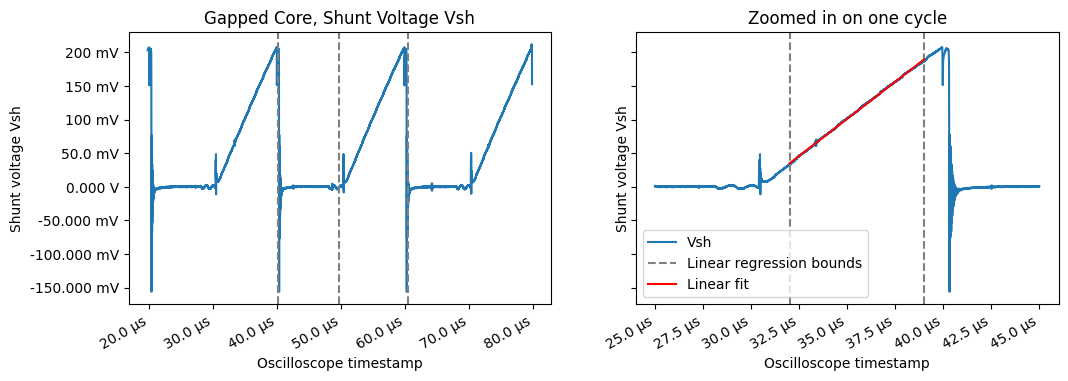

In [69]:
(df, tspan, tstep) = helper.read_rigol_csv("IronCore_Vsh_Vd.csv", ch1 = "Vsh", ch2 = "Vd")
df_envelope = df
df_zoom = df[(df["t"] > 25e-6) & (df["t"] < 45e-6)]
linear_ts = (32e-6, 39e-6)
duty_cycle_ts = (40.2e-6, 49.6e-6, 60.4e-6)
df_linreg = df[(df["t"] > linear_ts[0]) & (df["t"] < linear_ts[1])]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Shunt voltage Vsh", "V", title = "Gapped Core, Shunt Voltage Vsh", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vsh"], label = "Vsh")
ax1.axvline(x = duty_cycle_ts[0], linestyle = "dashed", color = "grey", label = "Duty cycle markers")
ax1.axvline(x = duty_cycle_ts[1], linestyle = "dashed", color = "grey")
ax1.axvline(x = duty_cycle_ts[2], linestyle = "dashed", color = "grey")

helper.axes_labels("Oscilloscope timestamp", "s", "Shunt voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vsh"], label = "Vsh")
ax2.axvline(x = linear_ts[0], linestyle = "dashed", color = "grey", label = "Linear regression bounds")
ax2.axvline(x = linear_ts[1], linestyle = "dashed", color = "grey")

x = df_linreg["t"]
y = df_linreg["Vsh"]
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
ax2.plot(df_linreg["t"], df_linreg["t"] * a + b, linestyle = "solid", color = "red", label = "Linear fit")
ax2.legend(loc = "lower left")

Vin = 17.8 # V
Vout = 9.08 # V
dIdt = a / 0.05 # ohms
Vinductor = Vin - Vout
L = Vinductor / dIdt
print(f"dI/dt: {si_format(dIdt, precision = 2)}A/s")
print(f"L: {si_format(L, precision = 2)}H")

duty_cycle = 1 - (duty_cycle_ts[1] - duty_cycle_ts[0]) / ((duty_cycle_ts[2] - duty_cycle_ts[0]))
print(f"Duty cycle: {np.round(duty_cycle * 100, 2)}%")

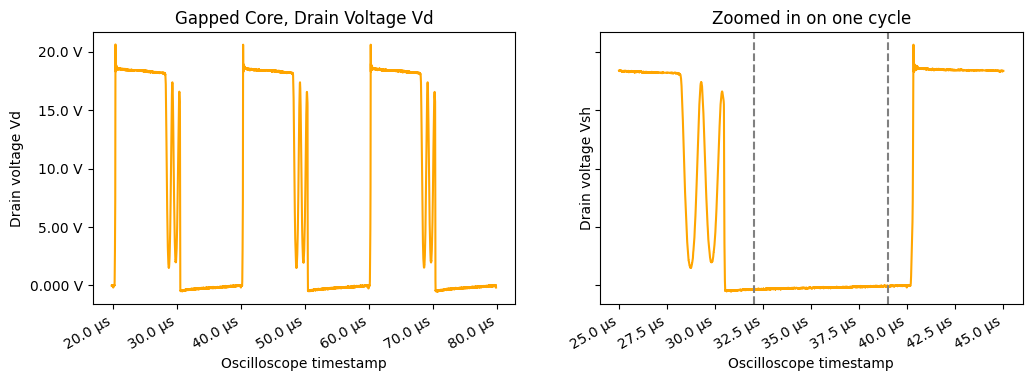

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Drain voltage Vd", "V", title = "Gapped Core, Drain Voltage Vd", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vd"], color = "orange", label = "Vd")

helper.axes_labels("Oscilloscope timestamp", "s", "Drain voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vd"], color = "orange", label = "Vd")
ax2.axvline(x = linear_ts[0], linestyle = "dashed", color = "grey", label = "Linear regression bounds")
ax2.axvline(x = linear_ts[1], linestyle = "dashed", color = "grey")

## Gapped core inductor, 3.23V output

L: 19.13 µH
Duty cycle: 15.42%


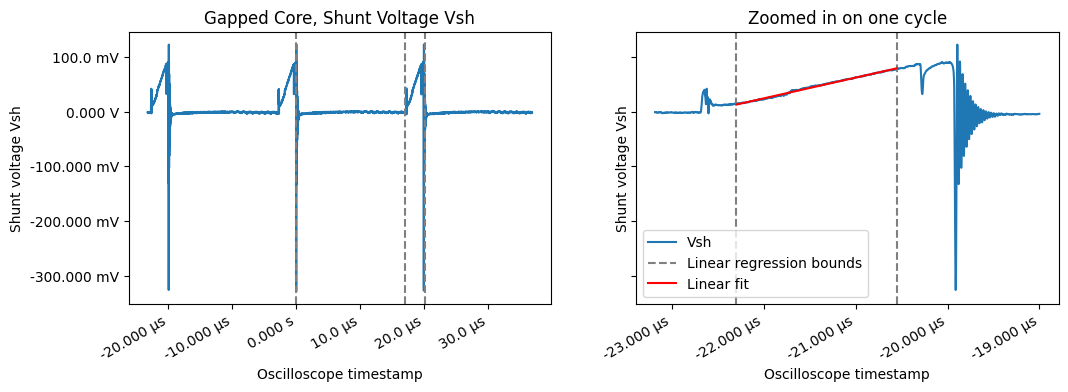

In [56]:
(df, tspan, tstep) = helper.read_rigol_csv("IronCore_Vsh_Vd_100mV.csv", ch1 = "Vsh", ch2 = "Vd")
df_envelope = df
df_zoom = df[(df["t"] > -25e-6) & (df["t"] < -19e-6)]
linear_ts = (-22.3e-6, -20.55e-6)
duty_cycle_ts = (0, 17e-6, 20.1e-6)
df_linreg = df[(df["t"] > linear_ts[0]) & (df["t"] < linear_ts[1])]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Shunt voltage Vsh", "V", title = "Gapped Core, Shunt Voltage Vsh", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vsh"], label = "Vsh")
ax1.axvline(x = duty_cycle_ts[0], linestyle = "dashed", color = "grey", label = "Duty cycle markers")
ax1.axvline(x = duty_cycle_ts[1], linestyle = "dashed", color = "grey")
ax1.axvline(x = duty_cycle_ts[2], linestyle = "dashed", color = "grey")

helper.axes_labels("Oscilloscope timestamp", "s", "Shunt voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vsh"], label = "Vsh")
ax2.axvline(x = linear_ts[0], linestyle = "dashed", color = "grey", label = "Linear regression bounds")
ax2.axvline(x = linear_ts[1], linestyle = "dashed", color = "grey")

x = df_linreg["t"]
y = df_linreg["Vsh"]
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
ax2.plot(df_linreg["t"], df_linreg["t"] * a + b, linestyle = "solid", color = "red", label = "Linear fit")
ax2.legend(loc = "lower left")

Vin = 17.8 # V
Vout = 3.23 # V
dIdt = a / 0.05 # ohms
Vinductor = Vin - Vout
L = Vinductor / dIdt
print(f"L: {si_format(L, precision = 2)}H")

duty_cycle = 1 - (duty_cycle_ts[1] - duty_cycle_ts[0]) / ((duty_cycle_ts[2] - duty_cycle_ts[0]))
print(f"Duty cycle: {np.round(duty_cycle * 100, 2)}%")

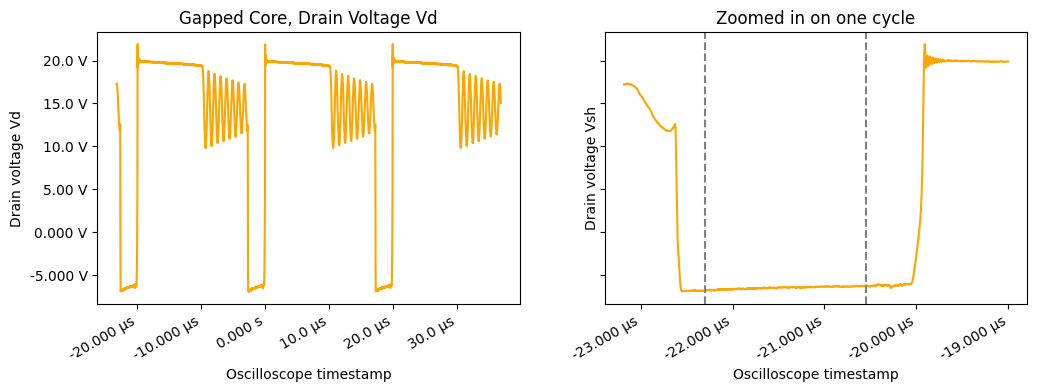

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Drain voltage Vd", "V", title = "Gapped Core, Drain Voltage Vd", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vd"], color = "orange", label = "Vd")

helper.axes_labels("Oscilloscope timestamp", "s", "Drain voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vd"], color = "orange", label = "Vd")
ax2.axvline(x = linear_ts[0], linestyle = "dashed", color = "grey", label = "Linear regression bounds")
ax2.axvline(x = linear_ts[1], linestyle = "dashed", color = "grey")

### For the triangular air core inductor

L: 20.32 µH


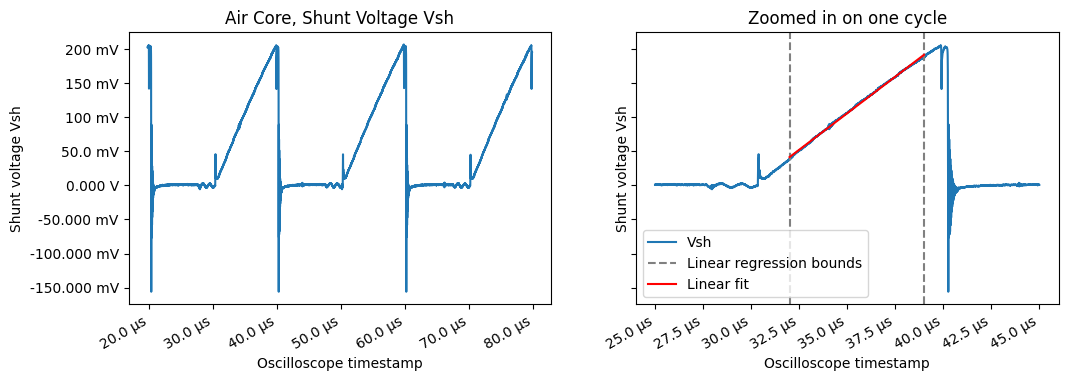

In [49]:
(df, tspan, tstep) = helper.read_rigol_csv("triangular_airCore.csv", ch1 = "Vsh", ch2 = "Vd")
df_envelope = df
df_zoom = df[(df["t"] > 25e-6) & (df["t"] < 45e-6)]
linear_ts = (32e-6, 39e-6)
df_linreg = df[(df["t"] > linear_ts[0]) & (df["t"] < linear_ts[1])]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Shunt voltage Vsh", "V", title = "Air Core, Shunt Voltage Vsh", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vsh"], label = "Vsh")

helper.axes_labels("Oscilloscope timestamp", "s", "Shunt voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vsh"], label = "Vsh")
ax2.axvline(x = linear_ts[0], linestyle = "dashed", color = "grey", label = "Linear regression bounds")
ax2.axvline(x = linear_ts[1], linestyle = "dashed", color = "grey")

x = df_linreg["t"]
y = df_linreg["Vsh"]
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
ax2.plot(df_linreg["t"], df_linreg["t"] * a + b, linestyle = "solid", color = "red", label = "Linear fit")
ax2.legend(loc = "lower left")

Vin = 17.8 # V
Vout = 9.08 # V
dIdt = a / 0.05 # ohms
Vinductor = Vin - Vout
L = Vinductor / dIdt
print(f"L: {si_format(L, precision = 2)}H")

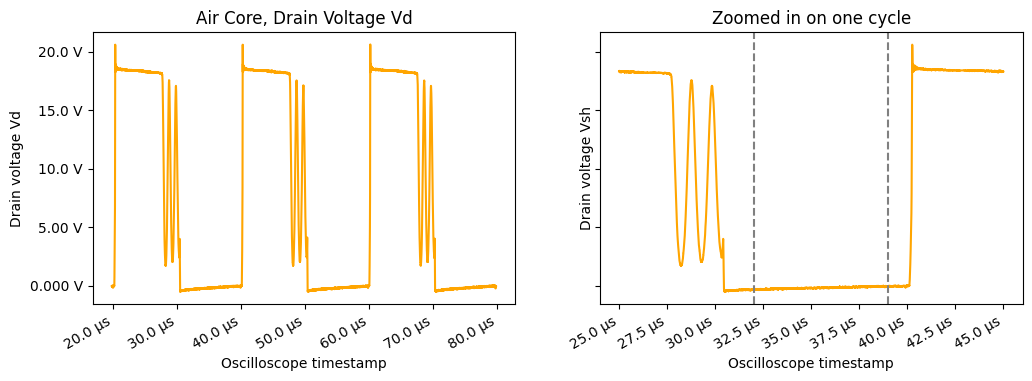

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Drain voltage Vd", "V", title = "Air Core, Drain Voltage Vd", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vd"], color = "orange", label = "Vd")

helper.axes_labels("Oscilloscope timestamp", "s", "Drain voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vd"], color = "orange", label = "Vd")
ax2.axvline(x = linear_ts[0], linestyle = "dashed", color = "grey", label = "Linear regression bounds")
ax2.axvline(x = linear_ts[1], linestyle = "dashed", color = "grey")

## Results:

The gapped core inductor had an experimental inductance value of 19.75uH at 4A of current and 19.13uH at 2A. My air core inductor from lesson 5 had an inductance of 20.32uH at a similar current. In both cases, this is a larger inductance than was obtained on the LCR meter (18.96uH and 18.69uH for the gapped core and air core, respectively).

This is reminiscent of Lab 3, in which the calculated inductance value also depended on current, albeit in Lab 3, the inductance decreased with higher current.

### Estimating efficiency
This is the entirety of my independent steps (I should have probably done more but I didn't have the time). I researched the Steinmetz equation by reading this app note:

https://www.we-online.com/components/media/o109035v410%20AppNotes_ANP029_AccurateInductorLossDeterminationUsingRedExpert_EN.pdf

I found Pcv from the inductor from the PC95 ferrite material datasheet and showed that at 50kHz, the power loss due to magnetic hysteresis is negligible.

In [37]:
# Imports and setup
from pint import UnitRegistry
import math
import numpy

# use pint
units = UnitRegistry()
units.default_format = "~P"

In [38]:
def power_efficiency(Vin, Iin, Vout, Rload = 5 * units.ohm):
    Iout = Vout / Rload
    return (Vout * Iout) / (Vin * Iin)

Iin_gap_core = 1.08 * units.amp
Vin_gap_core = 17.8 * units.volt
Vout_gap_core = 9.33 * units.volt
efficiency_gap_core = power_efficiency(Vin_gap_core, Iin_gap_core, Vout_gap_core)
print(f"Gap core inductor efficiency: {round(efficiency_gap_core.to_base_units() * 100, 2)}%")

Iin_air_core = 1.10 * units.amp
Vin_air_core = 17.8 * units.volt
Vout_air_core = 9.08 * units.volt
efficiency_air_core = power_efficiency(Vin_air_core, Iin_air_core, Vout_air_core)
print(f"Air core inductor efficiency: {round(efficiency_air_core.to_base_units() * 100, 2)}%")

Gap core inductor efficiency: 90.56%
Air core inductor efficiency: 84.21%


In [39]:
core_volume = 2850 * units.millimeter ** 3
Pcv = 30 * units.kilowatt / units.meter ** 3
power_loss = Pcv * core_volume
print(f"Power loss due to magnetic hysteresis: {round(power_loss.to('watt'), 2)}")
print(f"Total power through inductor: {round((Iin_gap_core * Vin_gap_core).to('watt'), 2)}")


Power loss due to magnetic hysteresis: 0.09 W
Total power through inductor: 19.22 W
